### Logistic regression

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

Import already prepared and cleaned data ( Full code in file  "RandomForest. EDA pipeline.ipynb")

In [6]:
train_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv")

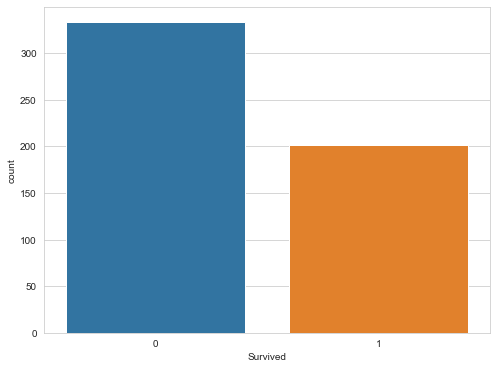

In [7]:
sb.countplot(x='Survived', data=train_labels)
plt.show()

In [8]:
log_reg = LogisticRegression()

In [9]:
log_reg.fit(train_features, train_labels)

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Perfomance on test dataset

In [10]:
log_reg.score(test_features, test_labels)  

0.7752808988764045

Predict classes (survived/not_survived ) for test dataset

In [11]:
survival = log_reg.predict(test_features)

In [12]:
print("OK ", sum(survival!=0))
print("NOT OK", sum(survival==0))

OK  59
NOT OK 119


In [27]:
test_labels.sum()

Survived    65
dtype: int64

Confusion Matrix

In [14]:
conf_mx = confusion_matrix(test_labels, survival)
conf_mx

array([[96, 17],
       [23, 42]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

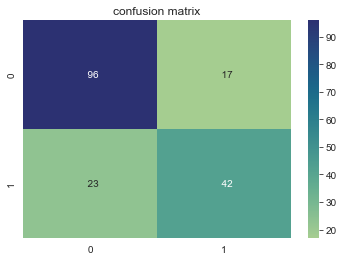

In [15]:
sb.heatmap(conf_mx, annot=True, fmt='4.0f', cmap='crest')
plt.title('confusion matrix', size=12)